In [1]:
!pip install pykrx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 17.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.2/52.2 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.0/247.0 kB 21.6 MB/s eta 0:00:00


In [2]:
!pip install koreanize_matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 12.7 MB/s eta 0:00:00


In [3]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
from tqdm.auto import tqdm
import random
import os
from pykrx import stock
import matplotlib.pyplot as plt
import koreanize_matplotlib
import warnings
warnings.filterwarnings('ignore')
import yfinance as yf

def reset_seeds(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)

DATA_PATH = "/content/drive/MyDrive/코랩파일들/파이널프로젝트/data/"
SEED = 42

Mounted at /content/drive


In [4]:
reset_seeds(SEED)

In [5]:
data = pd.read_csv(f"{DATA_PATH}labeled_data_final.csv")
def pad_str(str_list, target_len):

  padded_str_list = []
  for str in str_list:
    if len(str) < target_len:
      padded_str = "0" * (target_len - len(str)) + str
    else:
      padded_str = str
    padded_str_list.append(padded_str)
  return padded_str_list
str_list = data.Code.astype(str).to_list()
target_len = 6
padded_str_list = pad_str(str_list, target_len)

data.Code = padded_str_list

In [6]:
import datetime as dt
end_03 = dt.datetime(2023,3,1).strftime("%Y%m%d")
start_03 = (dt.datetime(2023,3,1).date() - dt.timedelta(365)).strftime("%Y%m%d")
end = dt.datetime.today().date().strftime("%Y%m%d")
start = (dt.datetime.today().date() - dt.timedelta(365)).strftime("%Y%m%d")
# end = dt.datetime(2022,12,31).strftime("%Y%m%d")
# start = (dt.datetime(2022,12,31) - dt.timedelta(180)).strftime("%Y%m%d")
print(start,end)

20220915 20230915


In [7]:
recommendation= data[((data['business'] == "A")|(data['business'] == "B")|(data['business'] == "C"))&
 ((data['performance'] == "A")|(data['performance'] == "B")|(data['performance'] == "A+")|(data['performance'] == "C"))&
  ((data['volitality'] == "A")|(data['volitality'] == "B")|(data['volitality'] == "A+")|(data['volitality'] == "C"))]
recommendation

,Code,Name,Market,recommendationKey,sharesOutstanding,averageVolume10days,averageVolume,heldPercentInstitutions,shortRatio,sharesPercentSharesOut,...,5년평균dividendYield,EBITDAPS,동종업계_대비_PER,dividend,growth,value,business,finance,performance,volitality
0,005930,삼성전자,KOSPI,4.0,5.969780e+09,15819172.0,13878613.0,0.47631,4.28,0.000124,...,2.870,12143.0,-1.04,C,C,D,B,F,A+,C
2,000660,SK하이닉스,KOSPI,4.0,7.082170e+08,4628225.0,3960678.0,0.40008,2.00,0.000072,...,1.462,28792.0,26.96,D,C,C,C,H,A,B
4,005490,POSCO홀딩스,KOSPI,3.9,7.587620e+07,2944335.0,1697713.0,0.30222,8.45,0.001327,...,4.364,99067.0,8.11,B,C,D,B,G,B,B
5,051910,LG화학,KOSPI,4.0,7.059230e+07,399881.0,287432.0,0.36433,6.50,0.000188,...,1.438,81652.0,14.63,D,C,D,B,G,B,C
7,005380,현대차,KOSPI,4.0,2.028760e+08,699789.0,594572.0,0.22792,4.89,0.000088,...,3.058,53685.0,-2.62,C,B,E,C,B,A,C
10,000270,기아,KOSPI,4.0,3.950820e+08,1446978.0,1229388.0,0.27907,17.01,0.000407,...,3.284,23820.0,-3.41,C,B,E,B,G,A,C
18,066570,LG전자,KOSPI,4.0,1.628850e+08,1065618.0,825302.0,0.26213,11.11,0.000518,...,0.912,36144.0,6.18,E,C,D,C,F,A,C
39,011200,HMM,KOSPI,3.2,4.890390e+08,1838939.0,2279608.0,0.30701,7.00,0.000117,...,3.430,22066.0,-1.80,C,C,E,A,H,A,A
58,011070,LG이노텍,KOSPI,4.0,2.366450e+07,235885.0,179614.0,0.28444,6.32,0.000281,...,0.680,91158.0,-3.29,E,C,E,B,H,B,C
109,039490,키움증권,KOSPI,4.0,2.481950e+07,106650.0,70016.0,0.31125,3.37,0.000165,...,1.676,161107.0,-0.58,D,B,E,A,F,B,C


In [8]:
stocks = recommendation["Name"].to_list()

In [9]:
stocks

['삼성전자',
 'SK하이닉스',
 'POSCO홀딩스',
 'LG화학',
 '현대차',
 '기아',
 'LG전자',
 'HMM',
 'LG이노텍',
 '키움증권',
 '효성첨단소재',
 '두산',
 '효성티앤씨']

In [10]:
def get_close(data,stocks,start,end): # stocks 전역변수 수정
    tmp = pd.DataFrame()
    for n in stocks:
        tmp[n] = stock.get_market_ohlcv(start, end, data[data['Name'] == n]['Code'])['종가']
    return tmp

In [11]:
before_data = get_close(data,stocks,start_03,end_03)
before_data

,삼성전자,SK하이닉스,POSCO홀딩스,LG화학,현대차,기아,LG전자,HMM,LG이노텍,키움증권,효성첨단소재,두산,효성티앤씨
날짜,,,,,,,,,,,,,
2022-03-02,71700,125000,283500,555000,170500,72100,123500,29100,320500,101500,487500,111500,478500
2022-03-03,72900,129000,290500,558000,177500,73800,127500,31000,345000,104500,510000,120500,493000
2022-03-04,71500,124500,291500,535000,172500,73100,123500,35400,337500,103500,505000,126000,499000
2022-03-07,70100,119500,285500,514000,168000,71100,120500,33800,338500,100000,492500,120000,480000
2022-03-08,69500,118000,276500,503000,168000,69600,118000,33950,346000,99600,485000,114000,476500
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-22,61100,89100,332000,666000,174200,74500,111100,21950,286000,103600,417500,85600,467000
2023-02-23,62000,92700,331500,668000,176200,76400,114700,22800,290500,107100,426500,91100,470000
2023-02-24,61300,91000,322000,669000,173900,75300,113400,23050,283000,106100,417500,90400,461500


In [12]:
now_data = get_close(data,stocks,start,end)
now_data

,삼성전자,SK하이닉스,POSCO홀딩스,LG화학,현대차,기아,LG전자,HMM,LG이노텍,키움증권,효성첨단소재,두산,효성티앤씨
날짜,,,,,,,,,,,,,
2022-09-15,56000,92000,235000,658000,198000,80000,92000,21050,344000,84300,424000,80400,308000
2022-09-16,56200,91200,230500,635000,201000,81100,90600,20600,332500,82900,409000,84100,306500
2022-09-19,56400,90000,231000,635000,201500,80800,90400,19850,334000,81900,395000,76100,298000
2022-09-20,55800,88000,239500,630000,198500,80400,89700,20100,343500,84100,396000,86700,300500
2022-09-21,55300,88000,238000,625000,197000,79700,88000,20400,343500,83800,394000,91000,291500
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-11,70800,115900,570000,561000,185500,77600,99200,16640,248500,101100,456500,149100,368000
2023-09-12,70500,116700,546000,559000,186200,77700,99000,16390,245500,100300,459000,139700,365500
2023-09-13,70900,118500,529000,540000,189800,78500,104200,15580,240500,103000,445000,129800,365500


In [13]:
# kospi200 = stock.get_index_ohlcv_by_date(start_03, end, "1028")['종가']
# display(kospi200)

In [14]:
import yfinance
kospi200_2016 = yfinance.download('^KS200',start = dt.datetime(2016,1,1))["Close"]
display(kospi200_2016)

[*********************100%%**********************]  1 of 1 completed


Date
2016-01-04    234.630005
2016-01-05    236.130005
2016-01-06    234.600006
2016-01-07    231.929993
2016-01-08    233.679993
                 ...    
2023-09-11    337.579987
2023-09-12    335.540009
2023-09-13    335.989990
2023-09-14    341.190002
2023-09-15    345.399994
Name: Close, Length: 1889, dtype: float64

In [15]:
kospi200 = kospi200_2016[kospi200_2016.index>=start_03]
kospi200

Date
2022-03-02    360.589996
2022-03-03    367.059998
2022-03-04    361.690002
2022-03-07    353.029999
2022-03-08    349.380005
                 ...    
2023-09-11    337.579987
2023-09-12    335.540009
2023-09-13    335.989990
2023-09-14    341.190002
2023-09-15    345.399994
Name: Close, Length: 384, dtype: float64

In [16]:
daily_ret = before_data[stocks].pct_change()
annual_ret = (1+daily_ret.mean())**before_data[stocks].shape[0]-1

daily_cov = daily_ret.cov()
annual_cov = daily_cov * before_data[stocks].shape[0]

In [17]:
tmp2 = pd.DataFrame((annual_ret-0.02)/daily_ret.std()*np.sqrt(252),columns= ['Shape']).sort_values(by='Shape',ascending=False)
stocks2 = list(tmp2.iloc[0:5].index)# 상위 5개 선정
daily_ret = before_data[stocks2].pct_change()
annual_ret = (1+daily_ret.mean())**before_data[stocks2].shape[0]-1
daily_cov = daily_ret.cov()
annual_cov = daily_cov * before_data[stocks2].shape[0]
rf = 0.0325
# 개별 shape 말고 고객에게 제시하는 주식 중 고객이 선택한 주식과 상관계수가 낮은 기업으로 포트폴리오를 구성해주는 것은 어떨까?

In [18]:
import scipy.optimize as sco
def stat(weights,annual_cov,annual_ret):
    returns = np.dot(weights, annual_ret)
    risk = np.sqrt(np.dot(weights.T, np.dot(annual_cov, weights)))
    return [risk,returns]

class Effective_frontier:
    def __init__(self,annual_cov,annual_ret):
        self.annual_cov = annual_cov
        self.annual_ret = annual_ret

    def ef(self,weight):
        return stat(weight,self.annual_cov,self.annual_ret)[0]**2

# def effective_frontier(weight):
#     return stat(weight,annual_cov,annual_ret)[0]**2

def get_portfolio(stocks,annual_ret,annual_cov):
    port_ret = []
    port_risk = []
    port_weights = []
    shape_ratio = []
    np.random.seed(42)
    for i in range(5000):

        weights = np.random.random(len(stocks))
        weights /= np.sum(weights)


        returns = np.dot(weights, annual_ret)

        risk = np.sqrt(np.dot(weights.T, np.dot(annual_cov, weights)))

        port_ret.append(returns)
        port_risk.append(risk)
        port_weights.append(weights)
        shape_ratio.append(returns/risk)

    portfolio = {'Returns' : port_ret, 'Risk' : port_risk, 'Shape' : shape_ratio}
    for j, s in enumerate(stocks):
        portfolio[s] = [weight[j] for weight in port_weights]

    df = pd.DataFrame(portfolio)

    max_shape = df.loc[df['Shape'] == df['Shape'].max()]
    min_risk = df.loc[df['Risk'] == df['Risk'].min()]

    weight = np.random.random(len(stocks))
    weight = weight/np.sum(weight)
    #최적화
    bnds = tuple((0,1) for x in range(len(stocks)))
    T_return = np.linspace(df['Returns'].min(),df['Returns'].max(),50) #수익률 구간 0~20%
    T_vol = []           #목표 수익률별 최저분산 포트폴리오의 표준편차가 들어갈 벡터

    ef = Effective_frontier(annual_cov,annual_ret)
    for r in T_return :
        cons = ({'type' : 'eq', 'fun' : lambda x : np.sum(x) - 1},   #np.sum(x) = 비중의 총합
                    {'type' : 'eq', 'fun' : lambda x : stat(x,annual_cov,annual_ret)[1] - r }) #Tr = 목표 수익률
        opts = sco.minimize(ef.ef, weight, method = 'SLSQP', bounds = bnds, constraints = cons) #제한 수익률에서 분산 minimize
        T_vol.append(np.sqrt(opts['fun']))


    tmp2 = pd.DataFrame({'Returns': T_return, 'Risk':T_vol})

    return max_shape,min_risk,tmp2,df

In [19]:
max_shape,min_risk,tmp2,df = get_portfolio(stocks2,annual_ret,annual_cov)

In [20]:
max_shape

,Returns,Risk,Shape,LG화학,POSCO홀딩스,기아,키움증권,현대차
2353,0.277292,0.331828,0.83565,0.649898,0.263409,0.053489,0.01049,0.022713


In [21]:
min_risk

,Returns,Risk,Shape,LG화학,POSCO홀딩스,기아,키움증권,현대차
3176,0.11059,0.226188,0.488929,0.018691,0.282372,0.176377,0.10135,0.421209


In [22]:
def show_CAPM(df, tmp2, max_shape, min_risk, rf=0.0325):
    df.plot.scatter(x='Risk', y='Returns', c='Shape', cmap='viridis', edgecolors='k', figsize=(10,8), grid=True)
    plt.plot(tmp2['Risk'], tmp2['Returns'], label='Efficient Frontier', linewidth=5,color='red')
    plt.scatter(max_shape['Risk'], max_shape['Returns'], label='Max_Shape', marker='*',s=500)
    plt.scatter(min_risk['Risk'], min_risk['Returns'], label='Min_risk', marker='*', s=500)
    plt.plot([0, max_shape['Risk'].iloc[0], 0.5], [rf, max_shape['Returns'].iloc[0], (max_shape['Returns'].iloc[0] - rf) / max_shape['Risk'].iloc[0] * 0.5 + rf], label='New EF', linewidth=2,color='green')
    plt.xlabel('Risk')
    plt.ylabel('Expected Return')
    plt.title('Efficient Frontier Graph')
    plt.legend()
    plt.show()

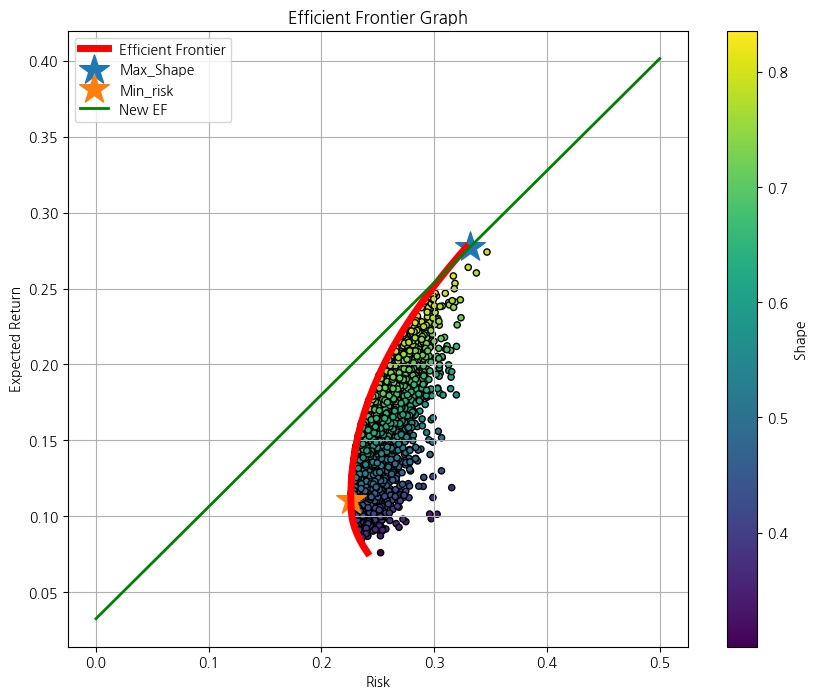

In [23]:
show_CAPM(df,tmp2,max_shape,min_risk,rf=0.0325)

In [24]:
def show_portfolio(max_sharpe):
    import plotly.graph_objects as go
    from plotly.subplots import make_subplots
    import sympy
    exp_ret = float(input("원하는 기대수익률은 얼마인가?"))/100
    w = sympy.Symbol('w')

    equation = w*0.02 + (1-w)*max_shape['Returns'].values[0] - exp_ret

    solution = sympy.solve(equation, w)
    solution = float(solution[0])
    if solution >= 0:

        fig = make_subplots(rows=1, cols=2, specs=[[{"type": "pie"}, {"type": "pie"}]],subplot_titles=(f"<b>포트폴리오<br><sup>Risk : {max_shape['Risk'].iloc[0]:0.4}</sup>",
                                                                                                       f"<b>기대수익을 위한 포트폴리오<br><sup>자기자본의 {solution*100:0.4}%만큼 채권투자</sup><br><sup>Risk:{(1-solution)*max_shape['Risk'].iloc[0]:0.4}</sup>"))

    else:
        fig = make_subplots(rows=1, cols=2, specs=[[{"type": "pie"}, {"type": "pie"}]],subplot_titles=(f"<b>포트폴리오<br><sup>Risk : {max_shape['Risk'].iloc[0]:0.4}</sup>",
                                                                                                       f"<b>투자금 비중<br><sup>자기자본의 {-solution*100:0.4}%만큼 차입</sup><br><sup>Risk:{(1-solution)*max_shape['Risk'].iloc[0]:0.4}</sup>"))
    if solution >= 0:
        fig.add_trace(go.Pie(
            values=list(max_sharpe.values[0][3:]),
            labels=list(max_sharpe.columns[3:]),
            domain=dict(x=[0, 0.5]),
            name="기존 포트폴리오"),
            row=1, col=1)

        fig.add_trace(go.Pie(
            values=list(max_sharpe.values[0][3:]* (1-float(solution)))+[float(solution)] ,
            labels=list(max_sharpe.columns[3:]) + ['채권'],
            domain=dict(x=[0.5, 1.0]),
            name="기대수익 포트폴리오"),
            row=1, col=2)


    else:
        fig.add_trace(go.Pie(
            values=list(max_sharpe.values[0][3:]),
            labels=list(max_sharpe.columns[3:]),
            domain=dict(x=[0, 0.5])),
            row=1, col=1)

        fig.add_trace(go.Pie(
            values=[1/(1-solution),1-(1/(1-solution))] ,
            labels=['자기자본','차입금'],
            domain=dict(x=[0.5, 1.0])),
            row=1, col=2)

    return fig, solution

In [25]:
max_shape

,Returns,Risk,Shape,LG화학,POSCO홀딩스,기아,키움증권,현대차
2353,0.277292,0.331828,0.83565,0.649898,0.263409,0.053489,0.01049,0.022713


In [26]:
fig, solution = show_portfolio(max_shape)

원하는 기대수익률은 얼마인가?20


In [27]:
fig.show()

In [28]:
def geometric_brownian_motion(tmp,S0, T=100, dt=1/100):
    """
    S0: 초기값
    mu: 평균
    sigma: 표준 편차
    T: 시뮬레이션 시간
    dt: 시간 간격
    """

    # Brownian motion
    W = np.random.normal(0, 1, (T, 1))

    daily_returns = tmp.pct_change().dropna()

    # 연간 수익률
    mean_return = daily_returns.mean()
    annual_return =((1 + mean_return) ** T) - 1

    # 변동성 계산
    mu = annual_return/T
    sigma = daily_returns.std()

    X = np.zeros((T, 1))
    X[0] = S0
    for t in range(1, T):
        X[t] = X[t - 1] * np.exp((mu - sigma ** 2 / 2) * dt + sigma * W[t])

    return X

def monte_sim(sim_num,tmp,stocks,stock_money,day=100):
    sim_num = sim_num
    balance_df = pd.DataFrame(np.zeros((sim_num,day)))
    for i in range(len(stocks)):
        X = []
        for k in range(sim_num):
            X.append(geometric_brownian_motion(tmp[stocks[i]],stock_money[stocks[i]].iloc[0]))
        balance_df += pd.DataFrame(np.array(X).reshape(sim_num,day))
    return balance_df.T

In [29]:
balance = 1000000
stock_money = max_shape[max_shape.columns[3:]]*balance
stock_money

,LG화학,POSCO홀딩스,기아,키움증권,현대차
2353,649898.34715,263409.198579,53489.402443,10489.647556,22713.404272


In [30]:
sim_num = 1000
balance_df = monte_sim(sim_num,before_data,stocks2,stock_money)
balance_df

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,...,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06
1,9.764401e+05,1.011037e+06,1.028559e+06,1.021205e+06,1.021741e+06,1.016383e+06,1.014687e+06,1.018082e+06,9.802217e+05,9.840551e+05,...,1.021563e+06,9.745873e+05,1.004911e+06,1.011970e+06,1.026712e+06,9.745113e+05,1.039619e+06,9.835983e+05,9.654404e+05,1.001163e+06
2,1.013911e+06,1.015937e+06,9.983470e+05,1.026970e+06,1.034857e+06,1.043684e+06,9.893881e+05,9.996887e+05,9.836581e+05,9.934070e+05,...,1.039494e+06,9.594956e+05,1.002024e+06,1.006967e+06,1.057824e+06,9.825803e+05,1.000526e+06,1.007971e+06,9.499024e+05,1.006556e+06
3,1.022862e+06,1.020090e+06,9.767420e+05,1.004106e+06,1.004677e+06,1.009184e+06,9.750102e+05,9.952588e+05,9.984276e+05,9.833044e+05,...,9.916936e+05,9.622563e+05,1.009860e+06,9.891940e+05,1.028053e+06,1.003261e+06,1.006159e+06,9.973874e+05,9.457439e+05,9.879446e+05
4,1.039956e+06,1.022447e+06,9.740814e+05,1.038844e+06,9.915667e+05,1.004631e+06,9.678853e+05,1.007051e+06,1.005736e+06,9.782007e+05,...,1.009599e+06,9.791863e+05,9.869157e+05,1.005024e+06,9.923638e+05,9.961845e+05,9.959618e+05,1.001070e+06,9.151918e+05,1.023321e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1.044204e+06,1.491325e+06,1.217615e+06,1.080749e+06,1.123607e+06,7.891074e+05,1.169633e+06,9.316908e+05,9.337124e+05,1.080609e+06,...,1.020012e+06,1.018914e+06,1.030255e+06,7.853612e+05,8.643447e+05,8.400061e+05,1.342713e+06,1.053164e+06,9.950257e+05,1.045684e+06
96,1.048110e+06,1.494485e+06,1.208603e+06,1.076211e+06,1.150466e+06,8.046724e+05,1.187938e+06,9.357423e+05,9.700219e+05,1.056003e+06,...,1.013334e+06,1.004362e+06,1.058137e+06,7.638119e+05,8.575099e+05,8.343359e+05,1.365988e+06,1.040656e+06,1.035799e+06,1.045958e+06
97,1.037397e+06,1.479789e+06,1.208387e+06,1.048555e+06,1.135079e+06,8.081575e+05,1.219544e+06,9.423952e+05,9.716151e+05,1.060166e+06,...,1.014538e+06,9.806723e+05,1.054411e+06,7.505133e+05,8.570358e+05,8.170066e+05,1.387591e+06,1.020900e+06,1.046709e+06,1.032441e+06
98,1.057651e+06,1.460748e+06,1.220317e+06,1.072614e+06,1.122643e+06,8.012805e+05,1.218642e+06,9.653863e+05,9.982646e+05,1.063034e+06,...,1.017031e+06,9.890939e+05,1.065341e+06,7.432580e+05,8.962727e+05,8.081727e+05,1.384960e+06,9.972357e+05,1.047043e+06,1.026083e+06


In [31]:
import plotly.express as px
def get_simret(balance_df,balance,stocks2,max_shape,solution,now_data=None,kospi200=None):
    port_weigth = max_shape[max_shape.columns[3:]].values
    tmp3 = pd.DataFrame()
    for i in [0.9,0.75,0.5,0.25,0.1]:
        lst = []
        idx = balance_df.T[balance_df.iloc[-1] >= balance_df.iloc[-1].quantile(i)][99].sort_values().index[0]
        for k in range(19,100,20):
            lst.append((balance_df.T.iloc[idx].iloc[k]-balance)/balance*100)
        tmp3[f'{100-i*100}%'] = lst

    tmp3.index=[f"{i}month" for i in range(1,6)]
    tmp3.columns =['호황','상승','평년','하락','불황']
    if now_data is not None:
        future_data = now_data[(now_data.index >before_data.index.max())&(now_data.index < dt.datetime(2023,8,2))]
        future_data = future_data[stocks2].groupby(future_data.index.to_period('M')).first()
        future_data = (future_data/future_data.iloc[0]-1).drop(index=future_data.index[0])
        tmp3['real'] = ((future_data*port_weigth).sum(axis=1)*100).to_list()
    if solution >0:
      tmp3 = tmp3*(1-solution) + rf*solution*100
    else:
      tmp3 = tmp3*(1-solution)

    if kospi200 is not None:
        f_kospi =kospi200[(kospi200.index >before_data.index.max())&(kospi200.index < dt.datetime(2023,8,2))]
        f_kospi = f_kospi.groupby(f_kospi.index.to_period('M')).first()
        f_kospi = (f_kospi/f_kospi.iloc[0]-1).drop(index=f_kospi.index[0])
        tmp3['KOSPI'] = (f_kospi*100).to_list()

    return tmp3

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptaqg2lwq/ctc1lb5_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptaqg2lwq/4hxbi68c.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=75112', 'data', 'file=/tmp/tmptaqg2lwq/ctc1lb5_.json', 'init=/tmp/tmptaqg2lwq/4hxbi68c.json', 'output', 'file=/tmp/tmptaqg2lwq/prophet_modelmr3l_0ws/prophet_model-20230915043322.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:33:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:33:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


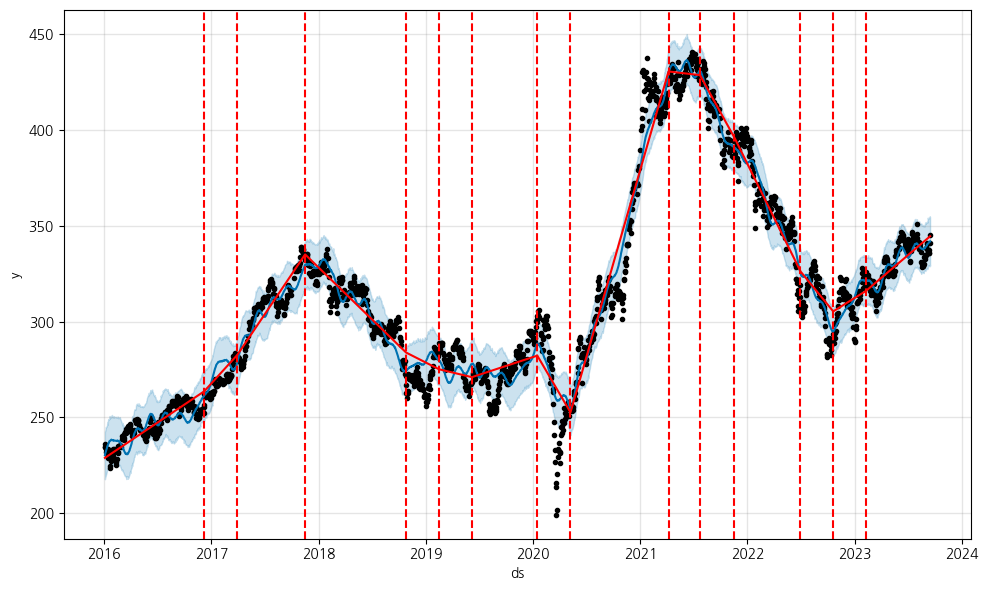

In [32]:
from prophet import Prophet
from prophet.plot import add_changepoints_to_plot
p_data =kospi200_2016.reset_index()
p_data.columns = ['ds','y']
m_prophet = Prophet(changepoint_range=1,)
m_prophet.fit(p_data)
np.random.seed(42)
future = m_prophet.make_future_dataframe(periods=0)
forecast = m_prophet.predict(future)
fig2 = m_prophet.plot(forecast)
a = add_changepoints_to_plot(fig2.gca(), m_prophet, forecast)
tmp3=pd.DataFrame()
tmp3['Date'] = fig2.gca().lines[2].get_xdata()
tmp3['Trend'] = fig2.gca().lines[2].get_ydata()

In [33]:
tmp3[tmp3['Date']>=before_data.index[-1]][:100]

,Date,Trend
1751,2023-02-28,318.515687
1752,2023-03-02,318.776638
1753,2023-03-03,318.907114
1754,2023-03-06,319.298542
1755,2023-03-07,319.429017
...,...,...
1846,2023-07-18,336.782300
1847,2023-07-19,336.912776
1848,2023-07-20,337.043251
1849,2023-07-21,337.173727


In [34]:
before_trend_line = tmp3[tmp3['Date']>=before_data.index[-1]][:100].reset_index(drop=True)
slope, intercept = np.polyfit(before_trend_line.index,before_trend_line['Trend'],1)

In [35]:
sim_data = get_simret(balance_df,balance,stocks2,max_shape,solution,now_data,kospi200)
display(sim_data)
display(px.line(sim_data))

,호황,상승,평년,하락,불황,real,KOSPI
1month,5.539322,0.266212,-0.482008,3.564868,-1.322989,6.457249,1.302724
2month,12.310339,0.162361,10.309222,1.471832,-6.509469,8.550371,4.056784
3month,24.599431,6.577025,11.400064,-9.351255,-12.636892,3.297023,6.899379
4month,26.964259,12.668736,12.135466,-7.812365,-15.602687,6.085096,8.480357
5month,21.086698,11.582881,2.060063,-7.195568,-12.788043,15.415752,10.984629


In [36]:
print(f'과거 시뮬레이션 당시의 상승추세 기울기는 {slope:0.4}였습니다. 향후 투자에 참고하십시오.')

과거 시뮬레이션 당시의 상승추세 기울기는 0.1932였습니다. 향후 투자에 참고하십시오.


지난 3월~ 8월은 상승장이었습니다. 따라서 시뮬레이션 결과인 상승장의 흐름을 많이 따라간 것을 알 수 있습니다.
따라서 향후 저희가 제시하는 포트폴리오를 보시고 시황에 맞게 대응하시면 될 것 같습니다.

In [37]:
stocks = recommendation["Name"].to_list()

In [38]:
daily_ret = now_data[stocks].pct_change()
annual_ret = (1+daily_ret.mean())**now_data[stocks].shape[0]-1

daily_cov = daily_ret.cov()
annual_cov = daily_cov * now_data[stocks].shape[0]

In [39]:
tmp2 = pd.DataFrame((annual_ret-0.02)/daily_ret.std()*np.sqrt(252),columns= ['Shape']).sort_values(by='Shape',ascending=False)
stocks2 = list(tmp2.iloc[0:5].index)# 상위 5개 선정
daily_ret = before_data[stocks2].pct_change()
annual_ret = (1+daily_ret.mean())**before_data[stocks2].shape[0]-1
daily_cov = daily_ret.cov()
annual_cov = daily_cov * before_data[stocks2].shape[0]
rf = 0.0325

In [40]:
max_shape,min_risk,tmp2,df = get_portfolio(stocks2,annual_ret,annual_cov)

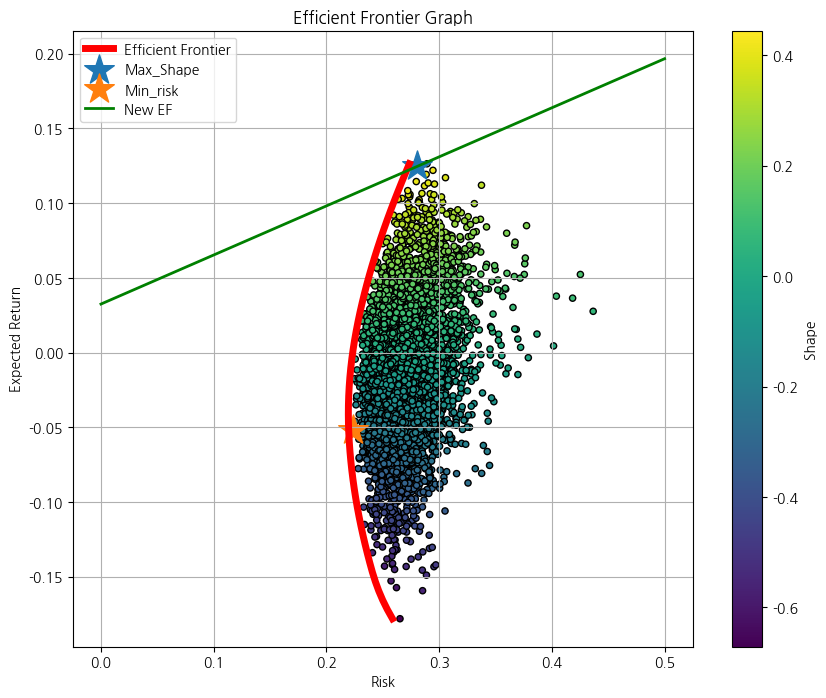

In [41]:
show_CAPM(df,tmp2,max_shape,min_risk,rf=0.0325)

In [42]:
max_shape

,Returns,Risk,Shape,POSCO홀딩스,두산,삼성전자,SK하이닉스,키움증권
3175,0.124554,0.2804,0.444202,0.656816,0.121487,0.006995,0.053056,0.161645


In [43]:
min_risk

,Returns,Risk,Shape,POSCO홀딩스,두산,삼성전자,SK하이닉스,키움증권
3619,-0.051913,0.223839,-0.231923,0.294283,0.019607,0.525097,0.152075,0.008938


In [44]:
fig,solution = show_portfolio(max_shape)

원하는 기대수익률은 얼마인가?20


In [45]:
fig.show()

In [46]:
balance = 1000000
stock_money = max_shape[max_shape.columns[3:]]*balance

sim_num = 1000
balance_df = monte_sim(sim_num,before_data,stocks2,stock_money)

In [47]:
sim_data2 = get_simret(balance_df,balance,stocks2,max_shape,solution,now_data=None,kospi200=None)
display(sim_data2)
display(px.line(sim_data2))

,호황,상승,평년,하락,불황
1month,-3.395228,17.877444,3.995225,3.798741,-5.310122
2month,11.681792,21.598517,8.329545,-6.414483,-8.485551
3month,11.394795,33.012761,-0.065986,-7.499146,-14.169392
4month,25.218301,34.448783,15.193710,-16.569177,-12.690904
5month,40.336416,21.264391,2.127599,-14.294991,-27.331421


In [48]:
now_trend_line = tmp3[tmp3['Date'] >= fig2.gca().lines[-1].get_xdata()[0]].reset_index(drop=True)
slope, intercept = np.polyfit(now_trend_line.index,now_trend_line['Trend'],1)

In [53]:
if (int((dt.datetime.now()- fig2.gca().lines[-1].get_xdata()[0]).days)>100) & (int((dt.datetime.now()- fig2.gca().lines[-1].get_xdata()[0]).days)<130):
  if slope > 0:
    print(f"현재 추세의 기울기는 {slope:0.4f}로 [상승추세]입니다.")
  else:
    print(f"현재 추세의 기울기는 {slope:0.4f}로 [하락추세]입니다.")
  print("변곡지점부터 100이상 지났습니다. 변곡지점이 가까우니 투자유의하시기바랍니다.")
  print(f"""과거 기록을 기준으로 보았을 때, 추세의 변곡점은 주로 추세시작일 기준 100일,200일 부근에서 발생했습니다. 참고하여 투자하시기 바랍니다.""")
elif (int((dt.datetime.now()- fig2.gca().lines[-1].get_xdata()[0]).days)>200) & (int((dt.datetime.now()- fig2.gca().lines[-1].get_xdata()[0]).days)<230):
  if slope > 0:
    print(f"현재 추세의 기울기는 {slope:0.4f}로 [상승추세]입니다.")
  else:
    print(f"현재 추세의 기울기는 {slope:0.4f}로 [하락추세]입니다.")
  print("변곡지점부터 200일이상 지났습니다. 변곡지점이 가까우니 투자유의하시기바랍니다.")
  print(f"""과거 기록을 기준으로 보았을 때, 추세의 변곡점은 주로 추세시작일 기준 100일,200일 부근에서 발생했습니다.\n참고하여 투자하시기 바랍니다.""")

현재 추세의 기울기는 0.1912로 [상승추세]입니다.
변곡지점부터 200일이상 지났습니다. 변곡지점이 가까우니 투자유의하시기바랍니다.
과거 기록을 기준으로 보았을 때, 추세의 변곡점은 주로 추세시작일 기준 100일,200일 부근에서 발생했습니다.
참고하여 투자하시기 바랍니다.


In [51]:
# if slope > 0:
#   print(f"현재 추세의 기울기는 {slope:0.4f}로 [상승추세]입니다.")
# else:
#   print(f"현재 추세의 기울기는 {slope:0.4f}로 [하락추세]입니다.")
# print(f"""현재 추세가 {int((dt.datetime.now()- fig2.gca().lines[-1].get_xdata()[0]).days)}일 동안 지속되었습니다.
# 과거 기록을 기준으로 보았을 때, 추세의 변곡점은 추세시작일 기준 100일,200일,300일 부근에서 발생했습니다.
# 참고하여 투자하시기 바랍니다.""")

현재 추세의 기울기는 0.1912로 [상승추세]입니다.
현재 추세가 219일 동안 지속되었습니다. 
과거 기록을 기준으로 보았을 때, 추세의 변곡점은 추세시작일 기준 100일,200일,300일 부근에서 발생했습니다.
참고하여 투자하시기 바랍니다.


In [54]:
stocks2

['POSCO홀딩스', '두산', '삼성전자', 'SK하이닉스', '키움증권']

POSCO홀딩스
두산
삼성전자
SK하이닉스
키움증권
